---

## Problem 4 (Challenge)

Prove that the decision boundary of the LDA classifier is linear.

*Hint:* Set the objective function for prediction $i^*$ equal to the objective function for prediction $j^*$ to obtain equation for the decision boundary.

# solution

Set

$$ \log n_i + \log p_i - \frac{1}{2} (\mathbf{x} - \hat{\mathbf{\mu}}_i)' \hat{\Sigma}^{-1} (\mathbf{x} - \hat{\mathbf{\mu}}_i) = \log n_j + \log p_j - \frac{1}{2} (\mathbf{x} - \hat{\mathbf{\mu}}_j)' \hat{\Sigma}^{-1} (\mathbf{x} - \hat{\mathbf{\mu}}_j)$$

After simplification, we get:

$$ \mathbf{x}' \hat{\Sigma}^{-1} (\mathbf{\hat{\mu}}_i - \mathbf{\hat{\mu}}_j) = \log \frac{n_i}{n_j} + \log \frac{p_i}{p_j} - \frac{1}{2} \Big( \hat{\mathbf{\mu}}_i' \hat{\Sigma}^{-1} \hat{\mathbf{\mu}}_i - \hat{\mathbf{\mu}}_j' \hat{\Sigma}^{-1} \hat{\mathbf{\mu}}_j \Big)$$

which is of the format

$$ \mathbf{x} \cdot \mathbf{n} = \text{const} $$

therefore, it specifies a hyperplane with normal vector $\hat{\Sigma}^{-1} (\mathbf{\hat{\mu}}_i - \mathbf{\hat{\mu}}_j)$.

---

## Problem 3

Train a Naive Bayes classifier to predict the species of flower for the Iris dataset. Compare its decisio n boundaries to that of QDA and LDA obtained above. Compute its accuracy.

In [ ]:
# worksheet
using Statistics, Distributions

μ = Dict()
σ = Dict()
Ns = Dict()

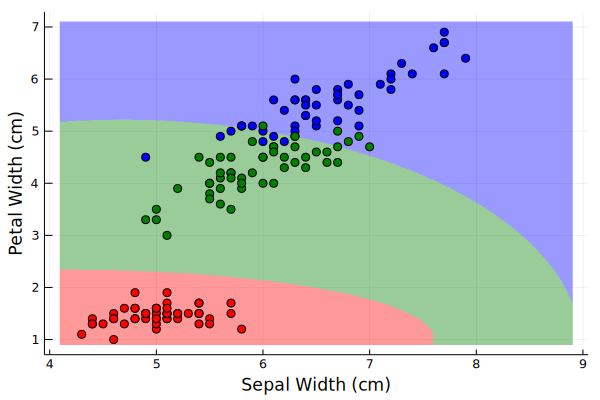

In [10]:
# solution
using Statistics, Distributions

μ = Dict()
σ = Dict()
Ns = Dict()

for species in keys(s2c)
    for feat in 1:2
        μ[(species, feat)] = mean([F.X[feat] for F in flowers if F.species == species])
        σ[(species, feat)] = std([F.X[feat] for F in flowers if F.species == species])
        Ns[(species, feat)] = Normal(μ[species, feat], σ[(species, feat)])
    end
end

predict(x, Ns) = argmax([(1.0/3.0)*pdf(Ns[species, 1],x[1])*pdf(Ns[species, 2],x[2]) for species 
            in keys(s2c)])

xgrid = 4.1:0.01:8.9
ygrid = 0.9:0.01:7.1

rgb = [:blue,:red,:green]
P = heatmap(xgrid, ygrid, (x,y) -> predict([x,y], Ns), fillcolor = cgrad(rgb), 
            opacity = 0.4, legend = false, fontfamily = "Palatino",
            xlabel = "Sepal Width (cm)", ylabel = "Petal Width (cm)")
for species in keys(s2c)
     scatter!(P, [(F.X[1], F.X[2]) for F in flowers if F.species == species], 
        color = s2c[species], label=species)
end
P

---

## Naive Bayes Classifier

So far, we have estimated a joint probability distribution over our features $(X_1,\cdots,X_d)$. Now, lets assume that all features are independent. With this assumption, we can model the distribution of samples for each feature as a *univariate* Gaussian. Therefore, for each class $i$ and feature $X_j$, we can estimate the density:

$$ f_{ij} \sim \mathcal{N}(\mu_{ij},\sigma_{ij})$$

Since each feature is i.i.d, density for class $i$ given feature vector $\mathbf{x}$:

$$ f_i(\mathbf{x}) = \prod_{j=1}^d f_{ij}(x_j)$$

We obtain the following classifier:

$$ i^* = \operatorname{argmax}_i \Big\{ p_i \prod_{j=1}^{d} f_{ij}(x_j) \Big\} = \operatorname{argmax}_i \Big\{ \log p_i + \sum_{j=1}^d \log f_{ij}(x_j) \Big\}$$

In [3]:
using Distributions
X = hcat(rand(Poisson(2),40), rand(Poisson(4),40))
X = hcat(X, X[:,1] + X[:,2])
print(X)

[3 5 8; 1 7 8; 1 1 2; 0 7 7; 1 4 5; 0 3 3; 3 4 7; 0 7 7; 0 3 3; 0 7 7; 2 6 8; 0 6 6; 0 4 4; 3 4 7; 4 3 7; 1 4 5; 2 4 6; 0 5 5; 1 7 8; 2 4 6; 1 4 5; 2 5 7; 3 1 4; 1 2 3; 1 6 7; 1 4 5; 4 5 9; 2 1 3; 1 4 5; 0 4 4; 2 6 8; 1 4 5; 0 7 7; 0 2 2; 3 3 6; 2 3 5; 0 3 3; 0 4 4; 1 5 6; 2 8 10]

In [5]:
X2 = hcat(rand(Poisson(3),40), rand(Poisson(3),40))
X2 = hcat(X2, X2[:,1] + X2[:,2])
print(X2)

[1 5 6; 2 1 3; 3 1 4; 3 5 8; 6 3 9; 4 1 5; 6 4 10; 4 5 9; 2 1 3; 4 2 6; 0 2 2; 4 3 7; 1 3 4; 2 2 4; 4 4 8; 7 2 9; 5 4 9; 4 2 6; 2 4 6; 1 5 6; 4 3 7; 4 1 5; 1 2 3; 2 6 8; 4 2 6; 3 4 7; 2 2 4; 2 3 5; 4 4 8; 2 2 4; 3 5 8; 4 2 6; 1 5 6; 1 4 5; 6 1 7; 0 2 2; 3 1 4; 3 4 7; 4 2 6; 2 8 10]

In [8]:
print([X[1:20,:]; X2[1:20,:]])

[3 3 6; 1 1 2; 0 0 0; 2 5 7; 5 3 8; 3 2 5; 5 2 7; 1 2 3; 6 4 10; 5 5 10; 2 3 5; 4 4 8; 7 2 9; 4 5 9; 1 5 6; 1 2 3; 0 2 2; 3 0 3; 2 4 6; 3 4 7; 1 5 6; 2 1 3; 3 1 4; 3 5 8; 6 3 9; 4 1 5; 6 4 10; 4 5 9; 2 1 3; 4 2 6; 0 2 2; 4 3 7; 1 3 4; 2 2 4; 4 4 8; 7 2 9; 5 4 9; 4 2 6; 2 4 6; 1 5 6]

In [61]:
function gen_design(v1, v2)
    X1 = hcat(rand(Poisson(v1[1]),40), rand(Poisson(v1[2]),40), rand(Poisson(v1[3]),40))
    X2 = hcat(rand(Poisson(v2[1]),40), rand(Poisson(v2[2]),40), rand(Poisson(v2[3]),40))
    vcat(X1, X2)
end

gen_design (generic function with 2 methods)

In [62]:
X_train = gen_design([1,2,3], [9, 10, 21])
Y_train = repeat([1,2], inner = 40);

In [63]:
N = NBBinaryClassifier([1,2],[])
fit!(N, X_train, Y_train);

In [69]:
sum(predict(N, X_train) .== Y_train)

80